<a href="https://colab.research.google.com/github/siddnhk/imad-2016-app/blob/master/Copy_of_RAProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#@title Default title text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  MinMaxScaler

In [70]:
data = pd.read_csv('NSWDemand.csv', parse_dates = True, index_col = 'SETTLEMENTDATE', low_memory= False)
data.head()


,REGIONID,DISPATCHINTERVAL,TOTALDEMAND,DEMANDFORECAST,LOWER5MINLOCALDISPATCH,LOWER60SECLOCALDISPATCH,LOWER6SECLOCALDISPATCH,RAISE5MINLOCALDISPATCH,RAISE60SECLOCALDISPATCH,RAISE6SECLOCALDISPATCH
SETTLEMENTDATE,,,,,,,,,,
2009-07-01 00:05:00,NSW1,20090630241,8770.64,-47.13867,22.23,16.0,16.0,248.00,163.05,145.01
2009-07-01 00:10:00,NSW1,20090630242,8808.24,-31.76758,32.46,16.0,16.0,248.00,167.00,137.00
2009-07-01 00:15:00,NSW1,20090630243,8823.20,-8.00293,41.77,16.0,16.0,268.00,163.87,137.00
2009-07-01 00:20:00,NSW1,20090630244,8776.82,-30.37109,38.00,16.0,16.0,258.00,167.00,150.57
2009-07-01 00:25:00,NSW1,20090630245,8725.02,-45.35449,41.44,16.0,16.0,259.76,166.98,148.91


In [72]:
data['2010']

,REGIONID,DISPATCHINTERVAL,TOTALDEMAND,DEMANDFORECAST,LOWER5MINLOCALDISPATCH,LOWER60SECLOCALDISPATCH,LOWER6SECLOCALDISPATCH,RAISE5MINLOCALDISPATCH,RAISE60SECLOCALDISPATCH,RAISE6SECLOCALDISPATCH
SETTLEMENTDATE,,,,,,,,,,
2010-01-01 00:00:00,NSW1,20091231240,7997.41,-43.64160,28.0,15.00,15.0,241.7,104.00,100.94
2010-01-01 00:05:00,NSW1,20091231241,7946.51,-22.30127,28.0,15.00,15.0,241.0,107.00,112.12
2010-01-01 00:10:00,NSW1,20091231242,7921.55,-37.73828,28.0,15.00,15.0,247.0,113.00,114.70
2010-01-01 00:15:00,NSW1,20091231243,7837.84,-51.88135,28.0,15.00,15.0,241.0,105.37,101.34
2010-01-01 00:20:00,NSW1,20091231244,7781.11,-56.55127,22.0,15.00,15.0,247.0,113.00,118.20
...,...,...,...,...,...,...,...,...,...,...
2010-12-31 23:35:00,NSW1,20101231235,8092.04,-32.32031,32.0,0.00,13.0,251.0,85.00,137.00
2010-12-31 23:40:00,NSW1,20101231236,8129.98,-33.00830,32.0,13.00,13.0,251.0,85.00,123.30
2010-12-31 23:45:00,NSW1,20101231237,8046.70,-27.48535,32.0,10.00,13.0,251.0,92.73,122.80


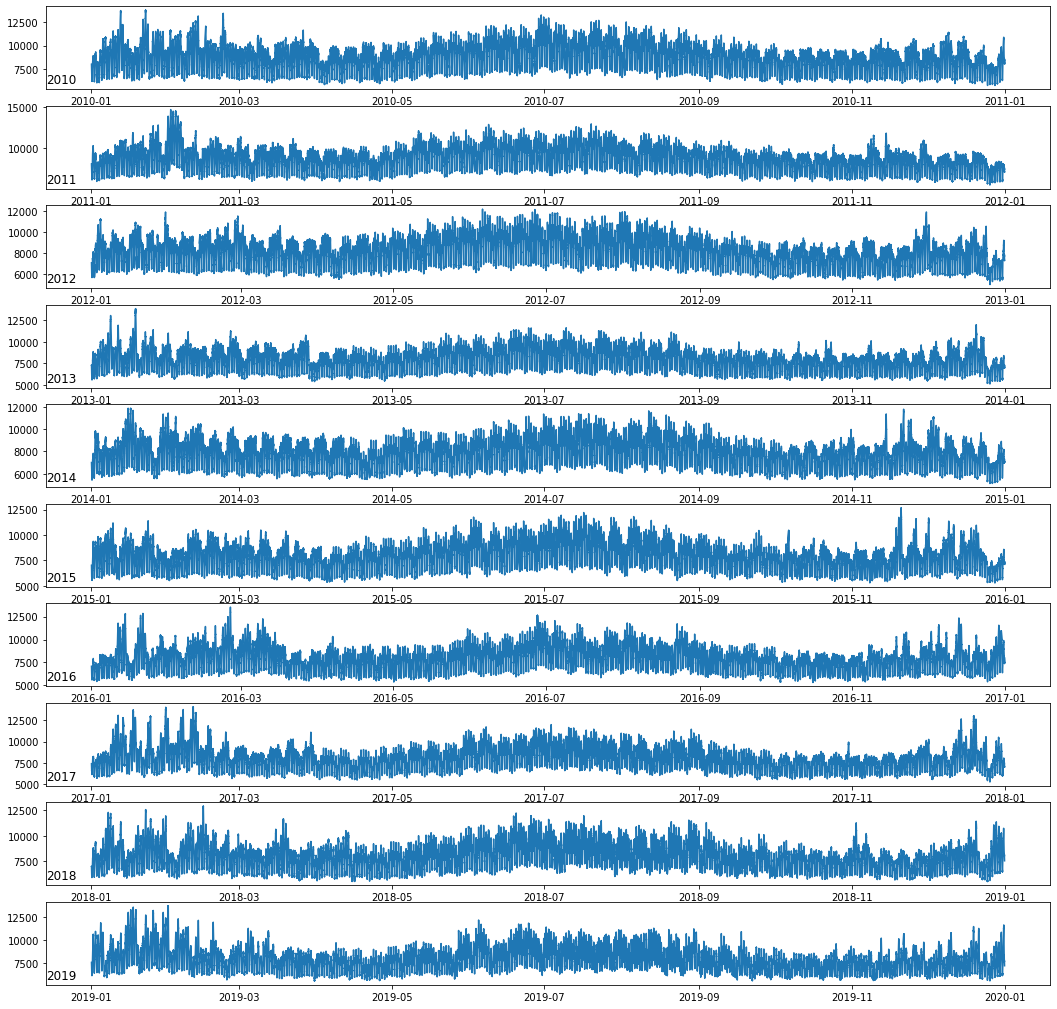

In [73]:
years = ['2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019']
fig, ax = plt.subplots(figsize=(18,18))

for i in range (len(years)):
    plt.subplot(len(years), 1,i+1)
    year = years[i]
    Demand_data = data[str(year)]
    plt.plot(Demand_data['TOTALDEMAND'])
    plt.title(str(year), y=0, loc ='left')
    
plt.show()
fig.tight_layout()

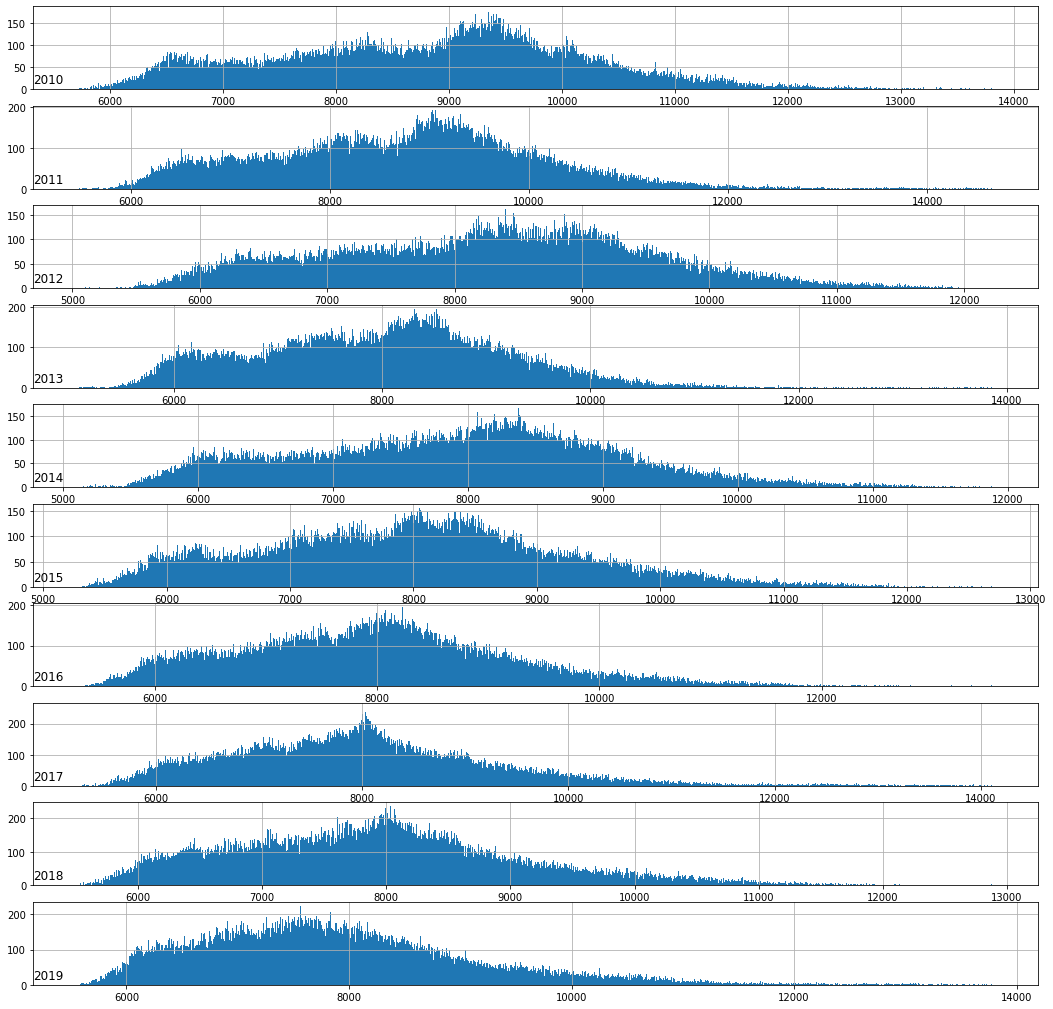

In [74]:
years = ['2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019']
fig, ax = plt.subplots(figsize=(18,18))

for i in range (len(years)):
    plt.subplot(len(years), 1,i+1)
    year = years[i]
    Demand_data = data[str(year)]
    Demand_data['TOTALDEMAND'].hist(bins=2000)
    plt.title(str(year), y=0, loc ='left')
    
plt.show()
fig.tight_layout()

In [75]:
data.tail()


,REGIONID,DISPATCHINTERVAL,TOTALDEMAND,DEMANDFORECAST,LOWER5MINLOCALDISPATCH,LOWER60SECLOCALDISPATCH,LOWER6SECLOCALDISPATCH,RAISE5MINLOCALDISPATCH,RAISE60SECLOCALDISPATCH,RAISE6SECLOCALDISPATCH
SETTLEMENTDATE,,,,,,,,,,
2019-12-31 23:35:00,NSW1,20191231235,7432.76,35.13257,35.00,35.0,15.00,53.0,94.44,145.30
2019-12-31 23:40:00,NSW1,20191231236,7378.19,-31.69092,35.00,25.0,15.38,53.0,93.15,143.42
2019-12-31 23:45:00,NSW1,20191231237,7347.80,-22.89355,15.00,30.0,30.00,47.0,97.02,152.02
2019-12-31 23:50:00,NSW1,20191231238,7271.51,-39.32861,19.99,30.0,30.00,47.0,99.68,164.31
2019-12-31 23:55:00,NSW1,20191231239,7236.89,-32.39844,15.86,35.0,35.00,47.0,102.71,166.93


In [79]:
data_train = data.loc['2010-01-01 00:00:00':'2017-12-31 23:55:00', 'DISPATCHINTERVAL':'RAISE6SECLOCALDISPATCH']
data_train.head()

,DISPATCHINTERVAL,TOTALDEMAND,DEMANDFORECAST,LOWER5MINLOCALDISPATCH,LOWER60SECLOCALDISPATCH,LOWER6SECLOCALDISPATCH,RAISE5MINLOCALDISPATCH,RAISE60SECLOCALDISPATCH,RAISE6SECLOCALDISPATCH
SETTLEMENTDATE,,,,,,,,,
2010-01-01 00:00:00,20091231240,7997.41,-43.64160,28.0,15.0,15.0,241.7,104.00,100.94
2010-01-01 00:05:00,20091231241,7946.51,-22.30127,28.0,15.0,15.0,241.0,107.00,112.12
2010-01-01 00:10:00,20091231242,7921.55,-37.73828,28.0,15.0,15.0,247.0,113.00,114.70
2010-01-01 00:15:00,20091231243,7837.84,-51.88135,28.0,15.0,15.0,241.0,105.37,101.34
2010-01-01 00:20:00,20091231244,7781.11,-56.55127,22.0,15.0,15.0,247.0,113.00,118.20


In [81]:
data_test = data.loc['2018-01-01 00:00:00':'2019-12-31 23:55:00', 'TOTALDEMAND']
data_test.head()

SETTLEMENTDATE
2018-01-01 00:00:00    7010.19
2018-01-01 00:05:00    7021.71
2018-01-01 00:10:00    6952.05
2018-01-01 00:15:00    6950.97
2018-01-01 00:20:00    6889.88
Name: TOTALDEMAND, dtype: float64

In [83]:
data_test.shape

(254878,)